1) Find which year each species had the largest population. Mark these years in the plot of populations.

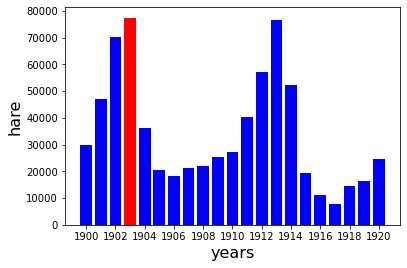

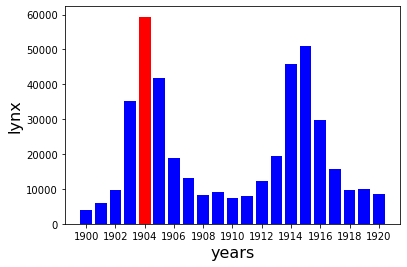

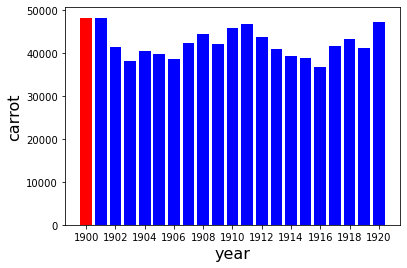

In [60]:
import numpy as np
import matplotlib.pyplot as plt
data=np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt', dtype=object , skiprows=1)
data = data.astype(float)
col=np.full(21,'b')
col[np.argmax(data[:,1])]='r'
plt.bar(data[:,0],data[:,1],color=col)
plt.xlabel('years',fontsize=16)
plt.ylabel('hare',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

col=np.full(21,'b')
col[np.argmax(data[:,2])]='r'
plt.bar(data[:,0],data[:,2],color=col)
plt.xlabel('years',fontsize=16)
plt.ylabel('lynx',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

col=np.full(21,'b')
col[np.argmax(data[:,3])]='r'
plt.bar(data[:,0],data[:,3],color=col)
plt.xlabel('year',fontsize=16)
plt.ylabel('carrot',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

2) Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

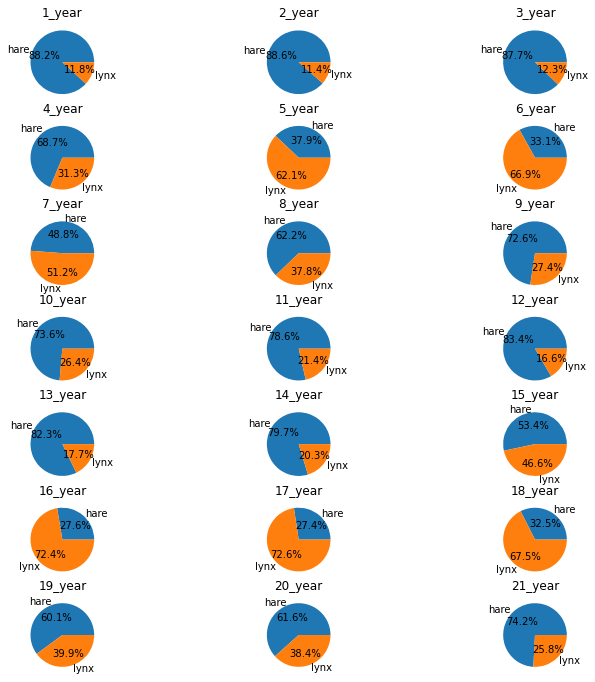

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


In [62]:
fig, axes = plt.subplots(nrows = 7, ncols =3 )
n=1
for ax in axes.flat:
    ax.set(title=str(n)+'_year', xticks=[], yticks=[])
    ax.pie([data[n-1,1],data[n-1,2]],labels=['hare','lynx'],autopct='%1.1f%%')
    n += 1
fig.set_figwidth(12)
fig.set_figheight(12) 
plt.show()
ans=np.full(21,'H')
for i in range(21) :
    if data[i,2]>data[i,1] : ans[i]='L'
print(ans)

3) Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

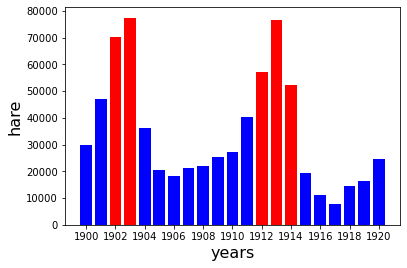

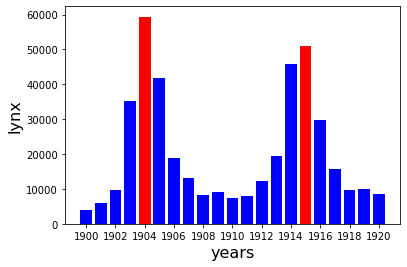

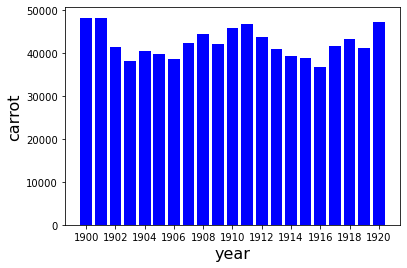

In [64]:
col=np.full(21,'b')
for i in range(21) :
    if data[i,1]>50000 : col[i]='r'
plt.bar(data[:,0],data[:,1],color=col)
plt.xlabel('years',fontsize=16)
plt.ylabel('hare',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

col=np.full(21,'b')
for i in range(21) :
    if data[i,2]>50000 : col[i]='r'
plt.bar(data[:,0],data[:,2],color=col)
plt.xlabel('years',fontsize=16)
plt.ylabel('lynx',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

col=np.full(21,'b')
for i in range(21) :
    if data[i,3]>50000 : col[i]='r'
plt.bar(data[:,0],data[:,3],color=col)
plt.xlabel('year',fontsize=16)
plt.ylabel('carrot',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

4) Find the top 2 years for each species when they had the lowest populations.

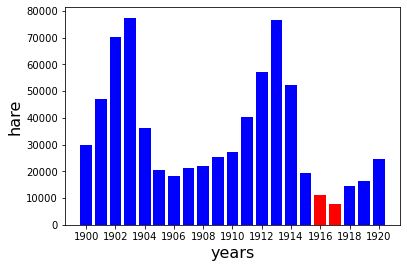

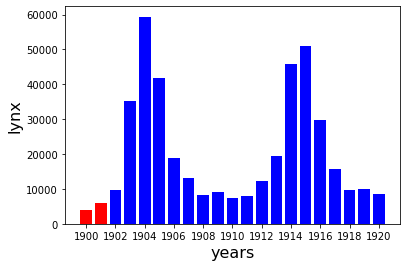

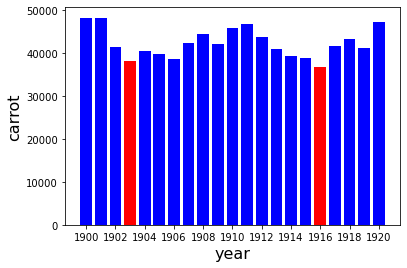

In [69]:
col=np.full(21,'b')
a=np.argsort(data[:,1])
col[a[0]]='r'
col[a[1]]='r'
plt.bar(data[:,0],data[:,1],color=col)
plt.xlabel('years',fontsize=16)
plt.ylabel('hare',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

col=np.full(21,'b')
a=np.argsort(data[:,2])
col[a[0]]='r'
col[a[1]]='r'
plt.bar(data[:,0],data[:,2],color=col)
plt.xlabel('years',fontsize=16)
plt.ylabel('lynx',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

col=np.full(21,'b')
a=np.argsort(data[:,3])
col[a[0]]='r'
col[a[1]]='r'
plt.bar(data[:,0],data[:,3],color=col)
plt.xlabel('year',fontsize=16)
plt.ylabel('carrot',fontsize=16)
plt.xticks(data[::2,0])
plt.show()

5) Show population of hares vs carrots and hares vs lynxes.

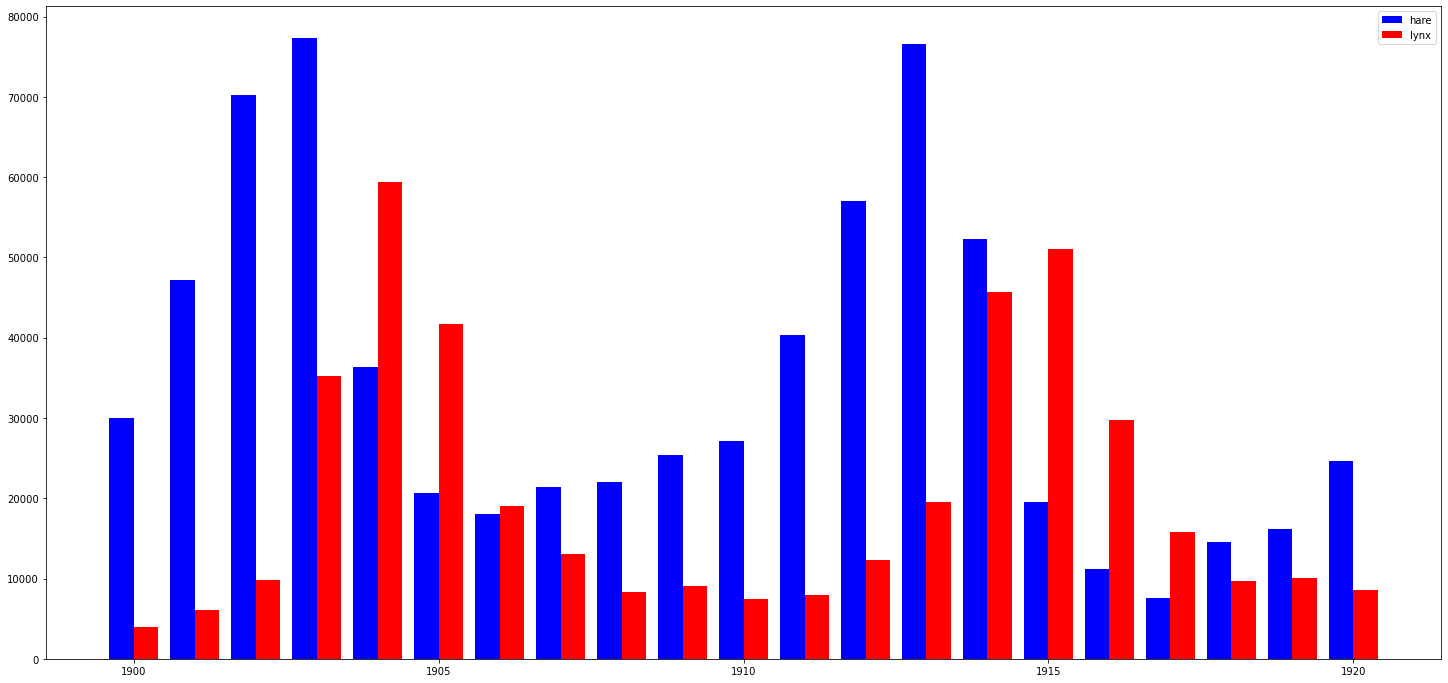

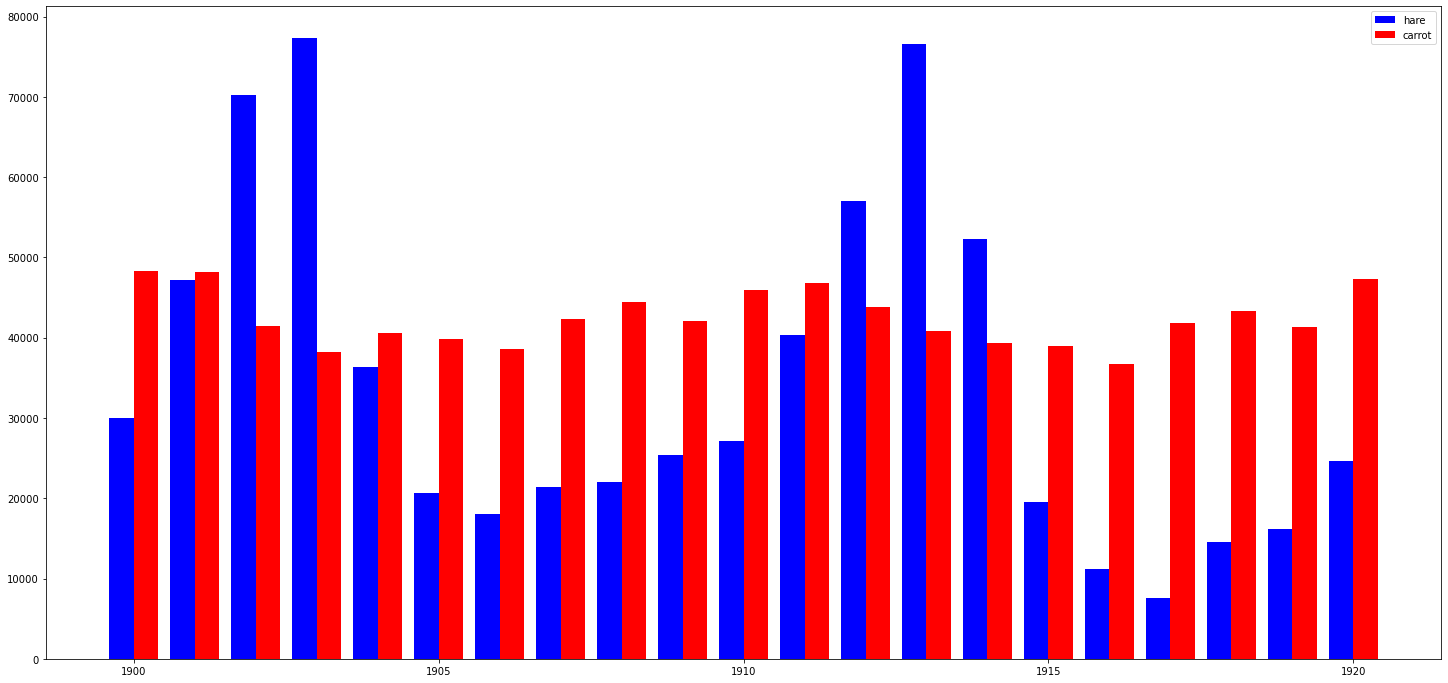

In [83]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.bar(data[:,0]-0.2,data[:,1],color='b',label='hare',width = 0.4)
ax.bar(data[:,0]+0.2,data[:,2],color='r',label='lynx',width = 0.4)
plt.legend()
fig.set_figwidth(25)   
fig.set_figheight(12)    
plt.show()

fig = plt.figure()
ax=fig.add_subplot(111)
ax.bar(data[:,0]-0.2,data[:,1],color='b',label='hare',width = 0.4)
ax.bar(data[:,0]+0.2,data[:,3],color='r',label='carrot',width = 0.4)
plt.legend()
fig.set_figwidth(25)   
fig.set_figheight(12)    
plt.show()

6) Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [129]:
#(предположим.что среднее числа лис и приращения зайцев постоянно)
const=((data[1:-1,1]-data[:-2,1]+data[1:-1,2])/2).mean()
delta=2*const-data[-1,2]
x=data[-2,1]+delta
abs(data[-1,1]-x)/data[-1,1]

0.15384615384615385

II) Plot a graph of total explained variance vs number of principal components.

In [99]:
from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
print(digits.data.shape)

(70000, 784)


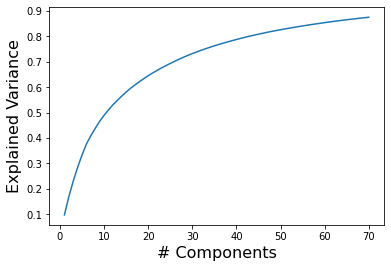

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=70)

pca.fit_transform(digits.data.astype(float))
var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(70)+1,var)
plt.xlabel('# Components',fontsize=16)
plt.ylabel('Explained Variance',fontsize=16)
plt.show()

III) Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [102]:
pca = PCA(n_components=784)
pca.fit_transform(digits.data.astype(float))
var = np.cumsum(pca.explained_variance_ratio_)

In [118]:
k=np.zeros(4,dtype=np.int16)
for i in range(var.size) :
    if var[i]> 0.85 :
        k[0]=i+1
        break
for i in range(var.size) :
    if var[i]> 0.90 :
        k[1]=i+1 
        break
for i in range(var.size) :
    if var[i]> 0.95 :
        k[2]=i+1
        break
for i in range(var.size) :
    if var[i]> 0.99 :
        k[3]=i+1
        break
print(' 80%:',k[0],'\n','85%:',k[1],'\n','95%:',k[2],'\n','99%:',k[3])

 80%: 59 
 85%: 87 
 95%: 154 
 99%: 331


IV)Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

In [123]:
X_restored=np.zeros([5,70000,784],dtype=np.int8)
X_restored[4]=digits.data.astype(float)
for j in range(4) :
    pca = PCA(n_components=k[j])
    X_transformed=pca.fit_transform(digits.data.astype(float))
    X_restored[j] = pca.inverse_transform(X_transformed)

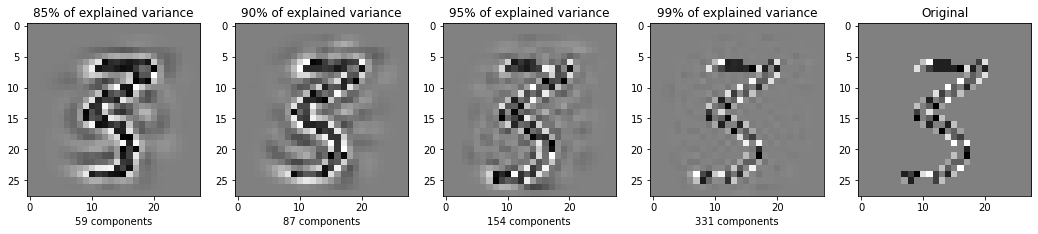

In [128]:
i=540
fig, ax = plt.subplots(1, 5)
for j in range(5) :
    ax[j].imshow(X_restored[j,i].reshape(28, 28), cmap='gray')
ax[0].set_title('85% of explained variance')
ax[1].set_title('90% of explained variance')
ax[2].set_title('95% of explained variance')
ax[3].set_title('99% of explained variance')
ax[4].set_title('Original')
ax[0].set_xlabel('59 components')
ax[1].set_xlabel('87 components')
ax[2].set_xlabel('154 components')
ax[3].set_xlabel('331 components')
fig.set_figwidth(18)   
fig.set_figheight(12) 
plt.show()